In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:150]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sepal Width')

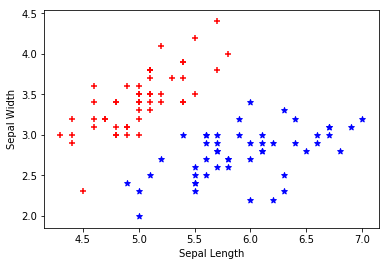

In [10]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], c= 'red', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], c= 'blue', marker='*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Sepal Width')

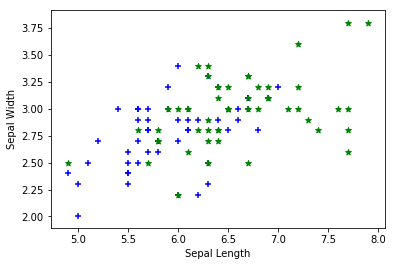

In [11]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], c= 'blue', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], c= 'green', marker='*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Sepal Width')

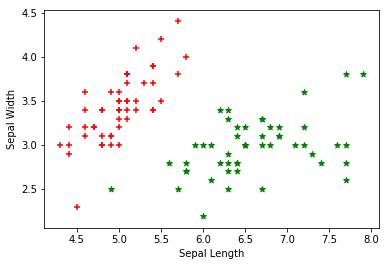

In [12]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], c= 'red', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], c= 'green', marker='*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

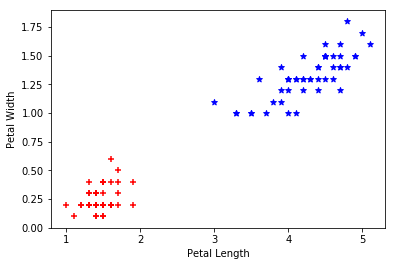

In [13]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], c= 'red', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c= 'blue', marker='*')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

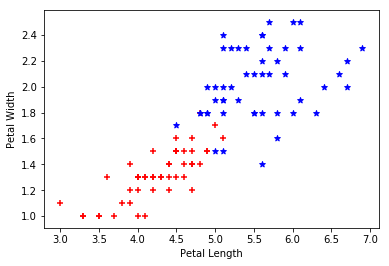

In [14]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c= 'red', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c= 'blue', marker='*')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [15]:
X = df.drop(['target'], axis= 'columns')
y = df.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [30]:
knn.score(X_test, y_test)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Actual')

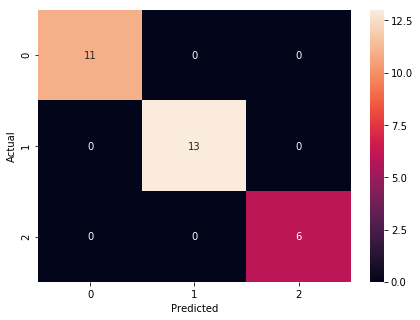

In [33]:
import seaborn as sn
plt.figure(figsize =(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

